#Matplotlib and Pandas for Climate Change data analysis and visualization

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from Nasa
## Global surface temperature
http://climate.nasa.gov/vital-signs/global-temperature/ 

In [4]:
data_temp = pd.read_csv('http://data.giss.nasa.gov/gistemp/graphs_v3/Fig.A2.txt', skiprows=3, 
                       delim_whitespace=True, nrows=135, header=0, names=['Promedio_anual', 
                       'Promedio_cada_5_años'],na_values=['*'], index_col=0)

In [34]:
# data_temp.head(6)
data_temp['id']=range(len(data_temp.Promedio_anual)) # id columns

## Plot annual mean and 5-year mean global temperature

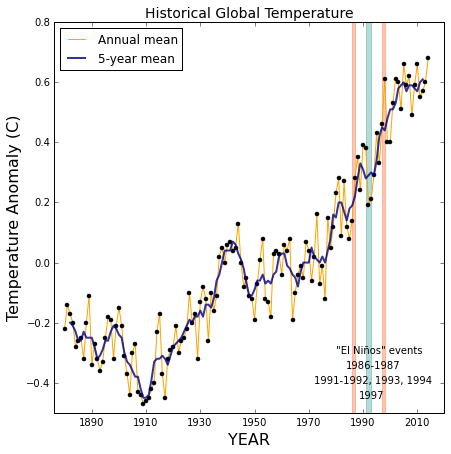

In [188]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
ax.plot(data_temp.Promedio_anual, color='orange', label='Annual mean')
ax.plot(data_temp.Promedio_anual, 'ko', markersize=4)
ax.plot(data_temp.Promedio_cada_5_años, color='Navy', label='5-year mean', linewidth=2, alpha=0.8)
ax.set_title('Historical Global Temperature', fontsize=14)
ax.legend(loc='best')
ax.set_ylim(-0.5, 0.8)
ax.set_xlim(-4, 140)
ax.set_xlabel('YEAR', fontsize=16)
ax.set_ylabel('Temperature Anomaly (C)', fontsize=16)
ax.set_xticks(range(10, 140, 20))
ax.set_xticklabels(data_temp.index[10::20]) # it must be start with the same value of the previous line
#ax.axhspan(data_temp.Promedio_anual.loc[1997], data_temp.Promedio_anual.loc[1998], alpha=0.5)
ax.axvspan(117, 118, color='OrangeRed', alpha=0.3)
ax.axvspan(106, 107, color='OrangeRed', alpha=0.3)
ax.axvspan(111, 113, color='Teal', alpha=0.3)
ax.annotate('"El Niños" events',xy=(3, 0.2), xytext=(100, -0.3))
ax.annotate('1986-1987', xy=(3, 0.2), xytext=(104, -0.35))
ax.annotate('1991-1992, 1993, 1994', xy=(3, 0.2), xytext=(92, -0.4))
ax.annotate('1997', xy=(3, 0.2), xytext=(109, -0.45))
fig.gca()  # needed for the ipython-inline to display anything
#fig.savefig('temp1.png', dpi=300)
plt.show()

### Find Recent and historical "El Niños"
http://www.pmel.noaa.gov/tao/elnino/el-nino-story.html#recent

search dates in dataframe

In [79]:
#data_temp.loc[1997:1998]

## Global atmosphere CO2 content 
http://climate.nasa.gov/vital-signs/carbon-dioxide/ 

In [119]:
data_co2_year = pd.read_csv('ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_annmean_mlo.txt', comment='#', 
                       delim_whitespace=True, header=None, names=['mean', 'unc'],index_col=0)

In [152]:
data_co2_monthly = pd.read_csv('ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt', comment='#', 
                       delim_whitespace=True, header=None, names=['month', 'date', 
                       'average', 'interpolated', 'trend', 'days'], na_values=['-99.99'],index_col=0)

In [ ]:
# #####

## Atmospheric Global CO2 content trend per year 

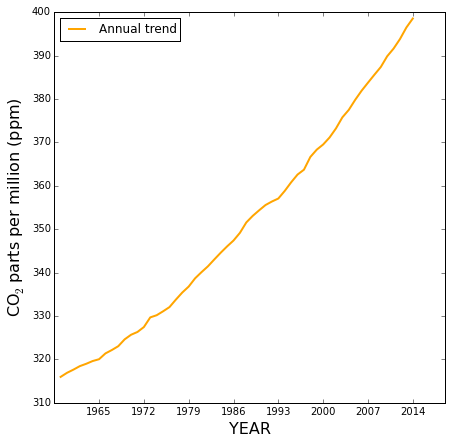

In [168]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
ax.plot(data_co2_year['mean'], color='orange', label='Annual trend', linewidth=2)
ax.legend(loc='best')
ax.set_xlabel('YEAR', fontsize=16)
ax.set_ylabel('CO$_{2}$ parts per million (ppm)', fontsize=16)
ax.set_xlim(-1, 60)
ax.set_xticks(range(6, len(data_co2_year['mean']), 7))#
ax.set_xticklabels(data_co2_year.index[6::7])
fig.gca()  # needed for the ipython-inline to display anything
#fig.savefig('co2_trend.png', dpi=300)
plt.show()

## Monthly Global atmospheric  CO2 content (2005 to present)

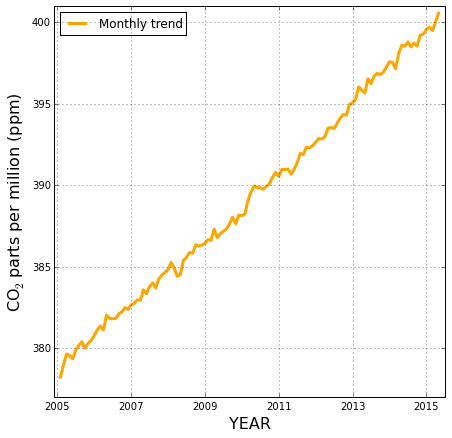

In [195]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
ax.plot(data_co2_monthly.trend[562::], color='orange', label='Monthly trend', linewidth=3) # Plot zoom to 2005
ax.legend(loc='best')
ax.set_xlabel('YEAR', fontsize=16)
ax.set_ylabel('CO$_{2}$ parts per million (ppm)', fontsize=16)
ax.set_ylim(377, 401)
ax.set_xlim(-2, 125)
ax.set_xticks(range(-1, 123 , 24)) # set ticks from 2005 to present
#ax.set_xticks(range(-1, 123, 12 )) # set ticks from 2005 to present
ax.set_xticklabels(data_co2_monthly.index[562::24])# set tick labels wothd years
ax.grid()
fig.gca()  # needed for the ipython-inline to display anything
#fig.savefig('co2_trend_zoom.png', dpi=300)
plt.show()

## Global Sea level

In [298]:
sea_level = pd.read_csv('http://climate.nasa.gov/system/internal_resources/details/original/121_Global_Sea_Level_Data_File.txt',
                       delim_whitespace=True, skiprows=46, usecols=(2, 11), header=None, names=['yeardec', 'level'])

In [299]:
# split decimal year for getting only the year

year = [] #create empty list

for i in sea_level.yeardec: 
    year.append(str(i).split('.')) #split each decimal year

year = pd.DataFrame(year) # create dataframe

sea_level.index = year[0] # reindex main dataframe
sea_level['id'] = range(len(sea_level.level)) # crate new column with id

idn = sea_level.groupby(sea_level.index)# group dataframe by index

In [323]:
### identify the id of El niño event in 1997-1998
idn.first()

,yeardec,level,id
0,,,
1993,1993.014526,-16.56,0
1994,1994.019653,-7.64,37
1995,1995.024780,-6.81,74
1996,1996.002808,-7.91,110
1997,1997.005127,-5.04,147
1998,1998.010254,5.19,184
1999,1999.015503,6.46,221
2000,2000.020508,12.33,258
2001,2001.023071,14.17,295


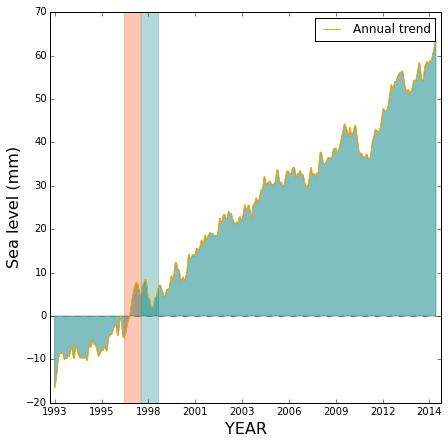

In [326]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
ax.fill_between(range(len(sea_level.level)),0, sea_level.level, 
                color='Teal', label='Annual trend', alpha=0.5)
ax.plot(sea_level.level, color='orange', label='Annual trend')
ax.legend(loc='best')
ax.set_xlabel('YEAR', fontsize=16)
ax.set_ylabel('Sea level (mm)', fontsize=16)
ax.axhline(y=0, color='Gray', linestyle='--')
ax.set_xlim(-9, 825)
ax.set_xticks(range(0, 815, 100))
ax.set_xticklabels(sea_level.index[::100])
ax.axvspan(147, 183, color='OrangeRed', alpha=0.3)
ax.axvspan(184, 220, color='Teal', alpha=0.3)
fig.gca()  # needed for the ipython-inline to display anything
#fig.savefig('co2_trend.png', dpi=300)
plt.show()

In [239]:
sea_level1 = pd.read_csv('http://climate.nasa.gov/system/internal_resources/details/original/121_Global_Sea_Level_Data_File.txt',
                       delim_whitespace=True, skiprows=46, usecols=(2, 11), header=None, names=['year', 'level'],
                        decimal='.', parse_dates=True)

In [203]:
??ax.fill_between
